<a href="https://colab.research.google.com/github/Manerrando28/Aula-do-site-do-mercado/blob/main/Sprint3_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Sprint 3 Data-Science




# Desafio 1: Baixa Visibilidade no Consumo de Materiais


NOME:GABRIEL GUILHERME LESTE

RM:558638


NOME:GABRIEL LACERDA ARAUJO

RM:558307


NOME:GABRIEL LUNI NAKASIMA

RM:558096



1. Definição do Problema de Regressão
Texto explicativo:
O desafio envolve prever a quantidade de consumo mensal de reagentes nas unidades de diagnóstico. Essa variável é contínua e pode ser estimada com base em variáveis operacionais como número de exames realizados, tipo de exame, turno e unidade.


In [43]:
# Simulando dados operacionais
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100

df = pd.DataFrame({
    'Unidade': np.random.choice(['Unidade A', 'Unidade B', 'Unidade C'], n),
    'Exames Realizados': np.random.randint(50, 300, n),
    'Tipo de Exame': np.random.choice(['Sangue', 'Urina', 'Imagem'], n),
    'Turno': np.random.choice(['Manhã', 'Tarde', 'Noite'], n),
    'Consumo Real': np.random.normal(loc=100, scale=20, size=n)
})

2. Hipóteses e Pressupostos
Texto explicativo:
Para validar a regressão linear, é necessário verificar:
- Linearidade: relação entre variáveis deve ser aproximadamente reta.
- Homoscedasticidade: resíduos devem ter variância constante.
- Normalidade dos resíduos: resíduos devem seguir distribuição normal.
Código:


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Codificando variáveis
df['Tipo de Exame Cod'] = df['Tipo de Exame'].map({'Sangue': 1, 'Urina': 2, 'Imagem': 3})
df['Turno Cod'] = df['Turno'].map({'Manhã': 1, 'Tarde': 2, 'Noite': 3})
df['Unidade Cod'] = df['Unidade'].map({'Unidade A': 1, 'Unidade B': 2, 'Unidade C': 3})

3. Construção do Modelo Simples:

Vamos relacionar apenas a variável Exames Realizados com o Consumo Real.


In [45]:
X_simples = df[['Exames Realizados']]
y = df['Consumo Real']

modelo_simples = LinearRegression()
modelo_simples.fit(X_simples, y)
y_pred_simples = modelo_simples.predict(X_simples)

4. Interpretação:

O coeficiente indica o quanto o consumo aumenta por exame realizado. O intercepto representa o consumo mínimo mesmo sem exames.


In [46]:
print("Intercepto:", modelo_simples.intercept_)
print("Inclinação:", modelo_simples.coef_[0])

Intercepto: 107.91874269055941
Inclinação: -0.02912064332619232


5. Avaliação do Modelo Simples:

Usamos R² para medir o poder explicativo e RMSE para medir o erro médio.


In [47]:
from sklearn.metrics import r2_score, mean_squared_error

r2_simples = r2_score(y, y_pred_simples)
rmse_simples = np.sqrt(mean_squared_error(y, y_pred_simples))
print(f"R²: {r2_simples:.4f}")
print(f"RMSE: {rmse_simples:.2f}")

R²: 0.0123
RMSE: 20.32


6. Expansão para Múltipla:

Agora usamos várias variáveis independentes para melhorar a previsão.


In [48]:
X_multiplo = df[['Exames Realizados', 'Tipo de Exame Cod', 'Turno Cod', 'Unidade Cod']]
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_multiplo, y)
y_pred_multiplo = modelo_multiplo.predict(X_multiplo)

7. Análise dos Coeficientes:

Analisamos quais variáveis têm maior impacto e se algum sinal é inesperado.


In [49]:
coeficientes = pd.Series(modelo_multiplo.coef_, index=X_multiplo.columns)
print(coeficientes)

Exames Realizados   -0.025981
Tipo de Exame Cod   -1.063480
Turno Cod            2.925474
Unidade Cod         -0.279826
dtype: float64


8. Diagnóstico do Modelo:

Verificamos se os resíduos seguem os pressupostos da regressão


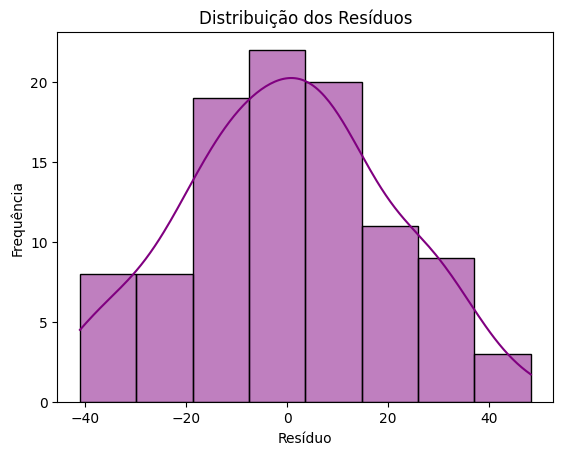

In [50]:
residuos = y - y_pred_multiplo
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()

9. Validação Cruzada:

Aplicamos validação cruzada com k=5 para verificar a generalização do modelo


In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_multiplo, X_multiplo, y, cv=5, scoring='r2')
print(f"R² médio na validação cruzada: {scores.mean():.4f}")

R² médio na validação cruzada: -0.1423


10. Aplicação no Negócio:

O modelo pode ser usado para prever consumo futuro, planejar compras e evitar falta ou excesso de materiais.




🔔 Unidades com necessidade de reposição:
      Unidade  Exames Realizados  Consumo Real  Consumo Previsto  \
51  Unidade A                 64    133.027020        104.939127   
57  Unidade A                112    137.440114        107.680979   
77  Unidade C                292    125.610815         97.657230   
32  Unidade B                153    147.780719        107.399402   
4   Unidade A                188    118.102439        106.769882   
28  Unidade C                265    131.207603         97.295244   
35  Unidade B                 84    116.575320        109.192110   
38  Unidade A                150    120.960395        106.693691   
71  Unidade B                 78    118.194763        104.295563   
53  Unidade A                 91    136.874316        107.163106   

    Estoque Final  Reposição Necessária  
51     -49.027020            153.966147  
57     -41.440114            149.121093  
77     -43.610815            141.268045  
32     -26.780719            134.180121  

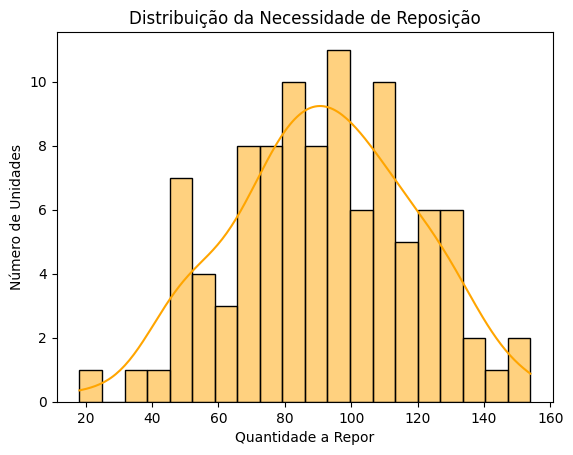

In [52]:
df['Estoque Inicial'] = np.random.randint(80, 150, size=n)
df['Estoque Final'] = df['Estoque Inicial'] - df['Consumo Real']
df['Consumo Previsto'] = y_pred_multiplo
df['Reposição Necessária'] = df['Consumo Previsto'] - df['Estoque Final']

relatorio = df[['Unidade', 'Exames Realizados', 'Consumo Real', 'Consumo Previsto', 'Estoque Final', 'Reposição Necessária']]
print("\n🔔 Unidades com necessidade de reposição:")
print(relatorio[relatorio['Reposição Necessária'] > 0].sort_values(by='Reposição Necessária', ascending=False).head(10))

sns.histplot(df['Reposição Necessária'], bins=20, kde=True, color='orange')
plt.title('Distribuição da Necessidade de Reposição')
plt.xlabel('Quantidade a Repor')
plt.ylabel('Número de Unidades')
plt.show()